In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import credentials
import sqlconnector as sql

In [2]:
#pip install mysql-connector-python

In [3]:
s = sql.sqlconnector(credentials.HOST,credentials.USER,credentials.PASSWORD,credentials.PORT,'product_mutual')

146484375.0

In [4]:
s.connect()

Connection Success


In [5]:
query = """ SELECT * from 
fund_weekly_return 
where 
statistic_date > '2018-01-01'
AND 
statistic_date < '2018-12-01'
AND
benchmark = 1
LIMIT 10000"""

In [12]:
query =  """
select * from 
fund_nv
where fund_id = 1
"""

In [20]:
query = """
select max(fund_id) from 
fund_nv
where statistic_date > '2021-12-01'
"""

In [8]:
query = """
select count(DISTINCT fund_id),statistic_date
from fund_monthly_return 
where 
benchmark = 1
group by
statistic_date 
having 
statistic_date
between 
'2010-01-01' and '2022-12-10'
"""

In [14]:
df_ret = s.fetch(query)

In [15]:
df_ret

,fund_id,fund_name,statistic_date,data_source,nav,added_nav,swanav,entry_time,update_time
0,000001,华夏成长混合,2001-12-18,020002,1.000000,1.000000,1.000000,2017-07-12 10:44:40,2019-01-15 19:15:10
1,000001,华夏成长混合,2001-12-21,020002,1.000000,1.000000,1.000000,2017-08-23 17:33:15,2019-01-15 19:15:10
2,000001,华夏成长混合,2001-12-28,020002,1.000000,1.000000,1.000000,2017-08-23 17:33:15,2019-01-15 19:15:10
3,000001,华夏成长混合,2002-01-04,020002,1.000000,1.000000,1.000000,2017-07-12 10:44:40,2019-01-15 19:15:10
4,000001,华夏成长混合,2002-01-11,020002,1.001000,1.001000,1.001000,2017-08-23 17:33:15,2019-01-15 19:15:10
...,...,...,...,...,...,...,...,...,...
4883,000001,华夏成长混合,2022-02-07,010006,1.053000,3.614000,6.802185,2022-02-07 20:49:24,2022-02-07 20:49:25
4884,000001,华夏成长混合,2022-02-08,010006,1.043000,3.604000,6.737586,2022-02-08 20:45:54,2022-02-08 20:45:54
4885,000001,华夏成长混合,2022-02-09,020001,1.054000,3.615000,6.808644,2022-02-09 20:25:33,2022-02-09 20:25:34
4886,000001,华夏成长混合,2022-02-10,010006,1.048000,3.609000,6.769886,2022-02-10 20:49:51,2022-02-10 20:49:51


(array([13879., 14610., 15340., 16071., 16801., 17532., 18262., 18993.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

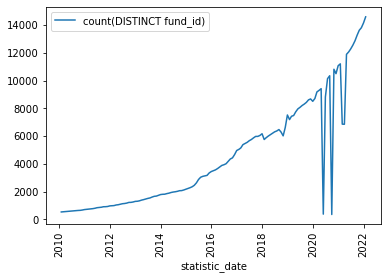

In [11]:
df_ret.set_index('statistic_date', inplace=True)
df_ret.plot()
plt.xticks(rotation = 90)